# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [1]:
#%pip install tensorflow --upgrade
#%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn import metrics as me

%matplotlib inline

## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [2]:
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
60000 train samples
10000 test samples


Create the MLP

In [3]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(2, activation='sigmoid'))
#model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │           1,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │              30 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,600 (6.25 KB)

 Trainable params: 1,600 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

Define some constants and train the MLP

In [4]:
batch_size = 128
n_epoch = 3

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_split=0.1)

Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2079 - loss: 2.1870 - val_accuracy: 0.3812 - val_loss: 1.9743
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3685 - loss: 1.9437 - val_accuracy: 0.3818 - val_loss: 1.8070
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3749 - loss: 1.7972 - val_accuracy: 0.3923 - val_loss: 1.6816


Show the performance of the model

Test score: 1.7052290439605713
Test accuracy: 0.3846000134944916


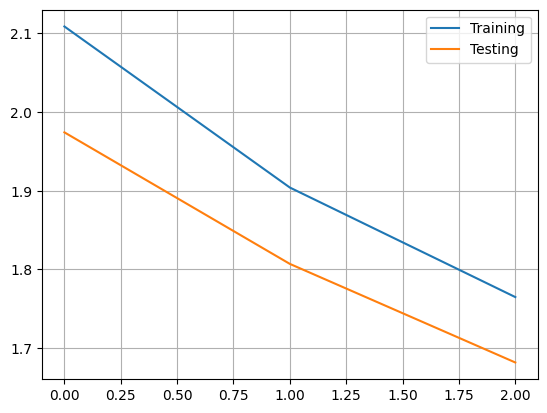

In [5]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [6]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
confusion_matrix(y_test, pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[   0,  859,   38,    5,    2,    0,    6,   65,    0,    5],
       [   0, 1073,   29,    6,    0,    0,   13,   10,    0,    4],
       [   0,  105,  851,    4,    4,    2,   38,   24,    0,    4],
       [   0,  124,  743,    3,   10,    1,   52,   64,    0,   13],
       [   0,    0,    8,    1,  106,    9,  765,   77,    0,   16],
       [   0,   45,   72,    5,   59,   11,  470,  195,    0,   35],
       [   0,   17,   54,    4,    6,    3,  855,   13,    0,    6],
       [   0,   63,   17,    2,    6,    1,   12,  923,    0,    4],
       [   0,   87,   44,    9,   62,   13,  197,  525,    0,   37],
       [   0,   14,    6,    1,   62,    9,   75,  818,    0,   24]])